# Medical Data Visualizer Project

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1.Import the data from medical_examination.csv and assign it to the df variable
df = pd.read_csv('medical_examination.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   sex          70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [3]:
df['height'] = df['height'] / 100
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0


In [4]:
# 2.Create the overweight column in the df variable
df['overweight'] = (df['weight'] / df['height']**2)

In [5]:
df['overweight'] = np.where(df['overweight'] > 25, 1 , 0)
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,0


In [6]:
# Normalize data by making 0 always good and 1 always bad
df['overweight'] = df['overweight'].replace({0: 'always good', 1: 'always bad'})
df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,1,1,0,0,1,0,always good
1,1,20228,1,1.56,85.0,140,90,3,1,0,0,1,1,always bad
2,2,18857,1,1.65,64.0,130,70,3,1,0,0,0,1,always good
3,3,17623,2,1.69,82.0,150,100,1,1,0,0,1,1,always bad
4,4,17474,1,1.56,56.0,100,60,1,1,0,0,0,0,always good


In [7]:
#3.Normalizing data
normal = ['cholesterol', 'gluc']
df[normal] = df[normal].applymap(lambda x: 0 if x == 1 else (1 if x > 1 else x))
df.head()

C:\Users\Delight\AppData\Local\Temp\ipykernel_19004\2373532042.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df[normal] = df[normal].applymap(lambda x: 0 if x == 1 else (1 if x > 1 else x))


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,always good
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,always bad
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,always good
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,always bad
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,always good


In [9]:
df['overweight'] = df['overweight'].replace({'always good': 0, 'always bad': 1})
df.head()

C:\Users\Delight\AppData\Local\Temp\ipykernel_19004\4141513528.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['overweight'] = df['overweight'].replace({'always good': 0, 'always bad': 1})


,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


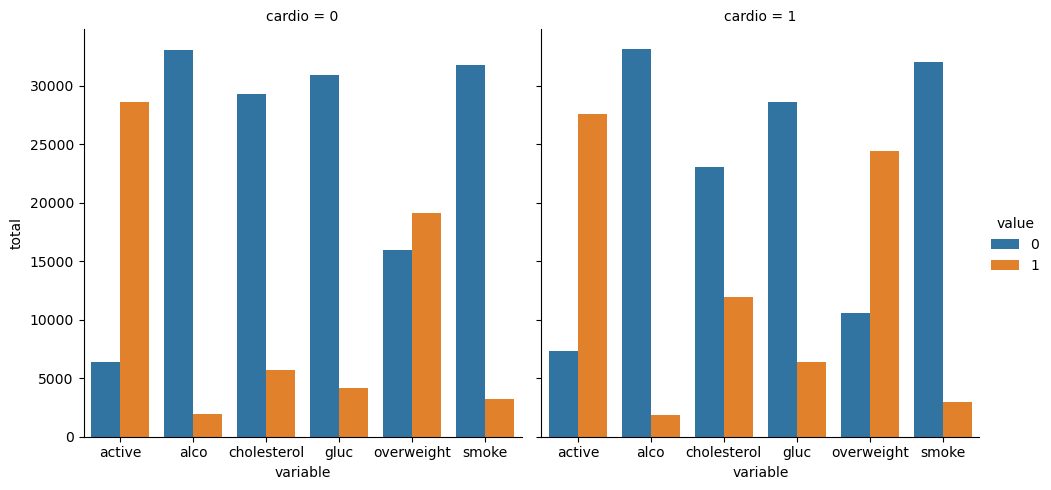

In [20]:
# 4.Categoriacal plot
#5-10 Changing the data to long format for plotting usint the catplot
melt = pd.melt(df, id_vars = 'cardio', value_vars= ['active','alco','cholesterol','gluc','overweight','smoke'],
              var_name='variable', value_name = 'value')
fig = sns.catplot(
    data = melt,
    kind = 'count',
    x = 'variable',
    hue = 'value',
    col = 'cardio'
)
fig.set_axis_labels('variable','total')
plt.show()

In [21]:
#11. Data Cleaning and filtering
df = df[df['ap_lo'] <= df['ap_hi']]

# Height
lower = df['height'].quantile(0.025)
higher = df['height'].quantile(0.975)

df = df[(df['height'] > lower) & (df['height'] < higher)]

# Weight
lower_w = df['weight'].quantile(0.025)
higher_h = df['weight'].quantile(0.975)

df = df[(df['weight'] > lower_w) & (df['weight'] < higher_h)]

df.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,1.68,62.0,110,80,0,0,0,0,1,0,0
1,1,20228,1,1.56,85.0,140,90,1,0,0,0,1,1,1
2,2,18857,1,1.65,64.0,130,70,1,0,0,0,0,1,0
3,3,17623,2,1.69,82.0,150,100,0,0,0,0,1,1,1
4,4,17474,1,1.56,56.0,100,60,0,0,0,0,0,0,0


C:\Users\Delight\anaconda3\envs\machine_learning\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


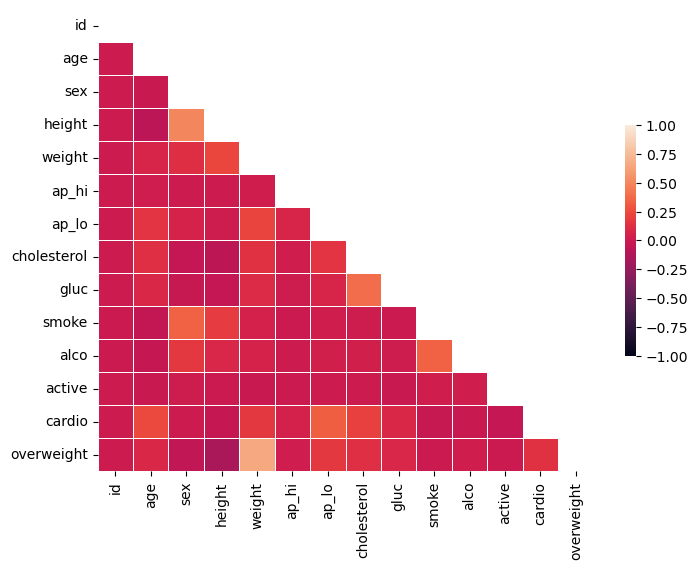

In [29]:
#12-16
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = 'bool'))

plt.figure(figsize=(8,6))

sns.heatmap(
    corr,
    annot=True,
    fmt='.2f',
    #annot_kws{'size':10},
    mask=mask,
    vmin = -1,
    vmax =1,
    linewidths=.5,
    cbar_kws={"shrink": .5}
)

plt.show()